# imports and defs

In [1]:
import utility_module_2_v_3 as uu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import numpy.ma as ma


path_obs='/media/vikram/subimal/Raw_Data/CRU/'
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/'


In [2]:
st=1901
en=2005
Nyears_train =en -st +1
Nyears_test = Nyears_train


data_bounds_cru=[ -125, 50, -70, 25]
data_bounds=[ 360-125, 50, 360-70, 25]

map_bounds= data_bounds
mp_spacing=10


# Read CRU data

## Read data

In [3]:
filename =path_obs +'cru_ts3.23.1901.2014.tmp.dat.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
#print(fh)
data = fh.variables['tmp'][:]

# 1901-2005
dt_st=0
dt_en=(en-st+1)*12

# cropping the study area out
l_lat,u_lat,lat_obs_cru=uu.find_bounds(lats,data_bounds_cru[3],data_bounds_cru[1])
l_lon,u_lon,lon_obs_cru=uu.find_bounds(lons,data_bounds_cru[0],data_bounds_cru[2])
lon_obs_cru=360+lon_obs_cru


tas_obs_cru=data[dt_st:dt_en,l_lat:u_lat+1,l_lon:u_lon+1]+273.15
del data
print(tas_obs_cru.shape,lat_obs_cru.shape,lon_obs_cru.shape)
#data_obs_cru_monb=data_obs_cru_mon
tas_obs=tas_obs_cru.data
mask_fine_obs=tas_obs_cru.mask[0,:,:]
N=tas_obs.shape[0]

(1260, 52, 112) (52,) (112,)


## Check

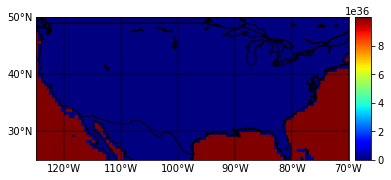

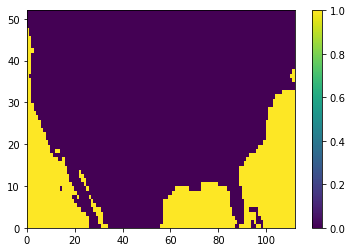

In [4]:
# plot spatial
mp_spacing=10
uu.map_plot_cyl(np.mean(tas_obs[:,:,:],axis=0),lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)

# plot temporal
plt.plot(tas_obs[:12*5,25,50])
plt.plot(tas_obs[-12*5:,25,50])


# plot mask
plt.figure()
plt.pcolor(mask_fine_obs)
plt.colorbar()

## Fill mask

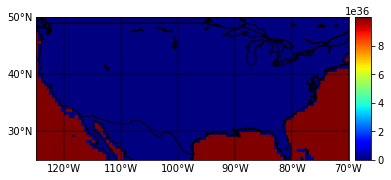

In [5]:
uu.map_plot_cyl(np.mean(tas_obs,axis=0),lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)

def create_distance_matrix(M,N,ii,jj):
  D=np.ones((M,N))*10000000
  for i in range(M):
    for j in range(N):
      D[i,j]=np.abs(i-ii)**2+0.1*np.abs(j-jj)**2
  return D

N1=tas_obs.shape[1]
N2=tas_obs.shape[2]

data_new=tas_obs+0.0001

for i in range(N1):
  for j in range(N2):
    if mask_fine_obs[i,j]==1:
      a=create_distance_matrix(N1,N2,i,j)+1000000*mask_fine_obs
      i_min,j_min= np.unravel_index(a.argmin(), a.shape)
      data_new[:,i,j]=tas_obs[:,i_min,j_min]




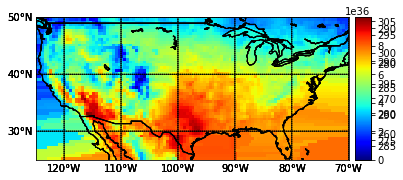

In [6]:

uu.map_plot_cyl(np.mean(tas_obs,axis=0),lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)
uu.map_plot_cyl(np.mean(data_new,axis=0),lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)
uu.map_plot_cyl(data_new[1,:,:],lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)
uu.map_plot_cyl(data_new[7,:,:],lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)



In [7]:

tas_obs=data_new
del data_new

# Read GCM

In [8]:
from netCDF4 import Dataset

date_ts=pd.date_range(start=str(st)+'-01-01',end=str(en)+'-12-31')
print(date_ts[0],date_ts[-1])
N=date_ts.shape[0]
print("N:1901-2005::",st,en,N,105*(365.25))

1901-01-01 00:00:00 2005-12-31 00:00:00
N:1901-2005:: 1901 2005 38351 38351.25


## MIROC_ESM

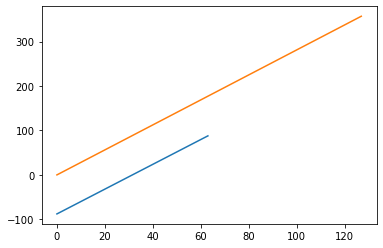

In [29]:
# reading file(s)
gcm_name='MIROC_ESM'
filename =  path_gcm +'/MIROC_ESM/tas_day_MIROC-ESM_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

data_gcm_daily = fh.variables['tas'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data



In [30]:
print(data_gcm_daily.shape,lat_gcm.shape,lon_gcm.shape,st_gcm)

(38351, 11, 22) (11,) (22,) 1850


## CanESM
Input file 
- contains one file \
- no leap year

38325 == 38325


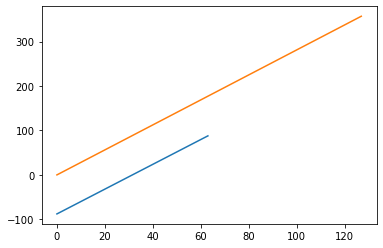

In [9]:
# reading file(s)
gcm_name='CanESM2'
filename = path_gcm + '/CanESM2/tas_day_CanESM2_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901
st_gcm=1850
dt_st=1901
index_of_st=(dt_st- st_gcm) *365

#print(fh)
data_gcm_daily = fh.variables['tas'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data
print(data_gcm_daily.shape[0],"==",365*105)
data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

In [12]:
print(data_gcm_daily.shape,N-data_gcm_daily.shape[0],lat_gcm.shape,lon_gcm.shape,st_gcm)

(38351, 11, 22) 0 (11,) (22,) 1850


## GFDL_CM3
Input files:
- 5 year files
- no leap years


In [20]:
gcm_name='GFDL_CM3'
st_gcm=1901
def get_fname(var,str1,str2):
  url=path_gcm +'/GFDL_CM3/'+var+'_day_GFDL-CM3_historical_r1i1p1_'+str1+'-'+str2+'.nc'
  return url

delta=5
def get_urls(var):
  fname_list=[]
  for yeaR in range(1900,2004,delta):
    str1=str(yeaR)+'0101'
    str2=str(yeaR+delta-1)+'1231'
    
    fname_list.append(get_fname(var,str1,str2))

  str1=str(2005)+'0101'
  str2=str(2005)+'1231'
  
  fname_list.append(get_fname(var,str1,str2))
  return fname_list


fnames=get_urls('tas')

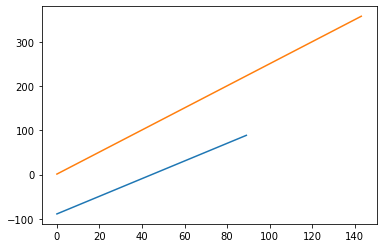

In [21]:
# reading file(s)
filename = fnames[0]
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

for i in range(len(fnames)):
  filename = fnames[i]
  fh = Dataset(filename, mode='r')
  lons = fh.variables['lon'][:]
  lats = fh.variables['lat'][:]
  #print(fh)
  data = fh.variables['tas'][:,l_lat:u_lat+1,l_lon:u_lon+1].data 

  if i==0:
    # starts at 1901
    data_gcm_daily=data[365:,:,:]
  else:
    data_gcm_daily=np.concatenate((data_gcm_daily,data),axis=0)
data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

In [23]:
gcm_name

'GFDL_CM3'

# Convert to monthly

In [32]:
print(data_gcm_daily.shape,N-data_gcm_daily.shape[0],lat_gcm.shape,lon_gcm.shape,st_gcm)
tas_gcm=uu.daily_to_monthly_sts(data_gcm_daily,st,en,method='MEAN')
del data_gcm_daily

(38351, 11, 22) 0 (11,) (22,) 1850
Monthly data dimensions: (1260, 11, 22)


# other GCMs

In [ ]:
/media/vikram/One Touch/New CMIP5/CNRM_CM5/pr_Amon_CNRM-CM5_historical_r1i1p1_190001-200512.nc
/media/vikram/One Touch/New CMIP5/MRI_ESM1/pr_Amon_MRI-ESM1_historical_r1i1p1_185101-200512.nc
/media/vikram/One Touch/New CMIP5/ACCESS1_0/pr_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/MIROC_ESM/pr_Amon_MIROC-ESM_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/NorESM1_M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/MPI_ESM_MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/CM5A_LR/pr_Amon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc


(1872, 96, 192) (56978,) 56940
1260 == 1260


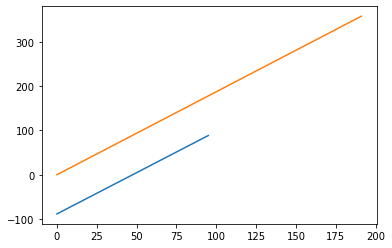

In [74]:
# reading file(s)
path_gcm  = "/media/vikram/One Touch/New CMIP5/"

gcm_name='MRI_ESM1'
filename = path_gcm + 'MRI_ESM1/tas_Amon_MRI-ESM1_historical_r1i1p1_185101-200512.nc'
st_gcm=1851


gcm_name='ACCESS1_0'
filename = path_gcm + 'ACCESS1_0/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc'
st_gcm=1850


gcm_name='NorESM1_M'
filename = path_gcm + 'NorESM1_M/tas_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc'
st_gcm=1850


gcm_name='CM5A_LR'
filename = path_gcm + 'CM5A_LR/tas_Amon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc'
st_gcm=1850


gcm_name='CNRM_CM5'
filename = path_gcm + 'CNRM_CM5/tas_Amon_CNRM-CM5_historical_r1i1p1_190001-200512.nc'
st_gcm=1900


gcm_name='MPI_ESM_MR'
filename = path_gcm + 'MPI_ESM_MR/tas_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc'
st_gcm=1850



fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])


date_gcms = pd.date_range(start=str(st_gcm) + "/01/01",end="2005/12/31",freq = "D")
print(fh.variables['tas'].shape,date_gcms.shape,365*(2005 - st_gcm+1))

# cropping years before 1901

dt_st=1901
index_of_st=(st- st_gcm) *12


tas_gcm = fh.variables['tas'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data
print(tas_gcm.shape[0],"==",12*105)
# data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

# check

(1260, 16, 31)


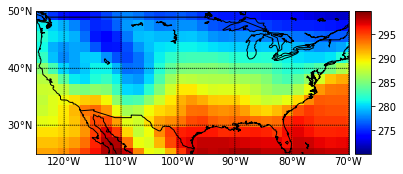

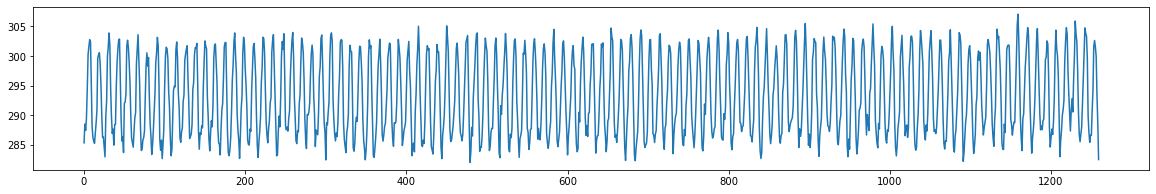

In [75]:
uu.map_plot_cyl(np.mean(tas_gcm,axis=0),lat_gcm,lon_gcm,map_bounds,mp_spacing=10)

plt.figure(figsize=(20,3))
plt.plot(tas_gcm[:,5,5])
print(tas_gcm.shape)

(1140, 160, 320) 1140
1140 == 1140


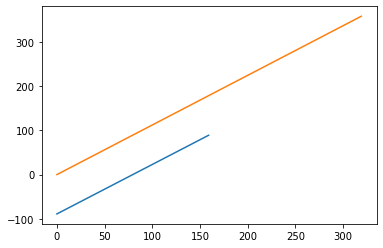

In [17]:
# reading file(s)
st_future = 2006
en_future = 2100

path_gcm  = "/media/vikram/One Touch/New CMIP5/"

gcm_name='CanESM2'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/CansESM2/tas_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc"
st_gcm=2006

# gcm_name='GFDL_CM3'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/GFDL_CM3/tas_Amon_GFDL-CM3_rcp85_r1i1p1_200601-210012.nc"

# gcm_name='NorESM1_M'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/NorESM/tas_Amon_NorESM1-M_rcp85_r1i1p1_200601-210012.nc"

# gcm_name='CM5A_LR'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/IPSL_CM5A/tas_Amon_IPSL-CM5A-LR_rcp85_r1i1p1_200601-230012.nc"

# gcm_name='MPI_ESM_MR'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/MPI_ESM_MR/tas_Amon_MPI-ESM-MR_rcp85_r1i1p1_200601-210012.nc"

gcm_name='MRI_ESM1'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/MRI_ESM/tas_Amon_MRI-ESM1_rcp85_r1i1p1_200601-210012.nc"

# gcm_name='MIROC_ESM'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/MIROC_ESM/tas_Amon_MIROC-ESM_rcp85_r1i1p1_200601-210012.nc"

# gcm_name='ACCESS1_0'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/ACCESS1_0/tas_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc"

# gcm_name='CNRM_CM5'
# filename = "/media/vikram/One Touch/New CMIP5/rcp85/CNRM_CM5/tas_Amon_CNRM-CM5_rcp85_r1i1p1_200601-210012.nc"





fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])


# date_gcms = pd.date_range(start=str(st_gcm) + "/01/01",end="2100/12/31",freq = "D")
print(fh.variables['tas'].shape,12*(2100 - st_gcm+1))

# cropping years before 1901

dt_st=2006
index_of_st=(st_future- st_gcm) *12
index_of_en=(en_future + 1 - st_gcm) *12 


tas_gcm_future = fh.variables['tas'][index_of_st:index_of_en,l_lat:u_lat+1,l_lon:u_lon+1].data
print(tas_gcm_future.shape[0],"==",12*95)
# data_gcm_daily=uu.add_leap_years_sts(data_gcm_d

# Writing outputs

In [18]:
# path_out = '/home/vikram/BCSD_data/' + 'US_T_BCSD_eqm/'
# !mkdir '/home/vikram/BCSD_data/US_T_BCSD_eqm/'
path_out = '/home/vikram/BCSD_data/' + 'US_T_BCSD/'
# !mkdir '/home/vikram/BCSD_data/US_T_BCSD/'


In [19]:
gcm_name

'MRI_ESM1'

In [20]:
np.save(path_out+'tas_gcm_future_'+gcm_name,tas_gcm_future)


In [21]:
data_bounds_cru

[-125, 50, -70, 25]

In [79]:
tas_obs_coarse=np.zeros(tas_gcm.shape)
tas_gcm_fine=np.zeros(tas_obs.shape)



for i in range(tas_obs.shape[0]):
  tas_obs_coarse[i,:,:]=uu.regrid(tas_obs[i,:,:],lat_obs_cru,lon_obs_cru,lat_gcm,lon_gcm)
  tas_gcm_fine[i,:,:]=uu.regrid(tas_gcm[i,:,:],lat_gcm,lon_gcm,lat_obs_cru,lon_obs_cru)

metadata={'st':st,
     'en':en,
     'mask':mask_fine_obs,
     'data_bounds':data_bounds,
     'Nyears_train':Nyears_train,
     'Nyears_test':Nyears_test,
     'path_out':path_out,
     'lat_obs':lat_obs_cru,
     'lat_gcm':lat_gcm,
     'lon_obs':lon_obs_cru,
     'lon_gcm':lon_gcm}

np.save(path_out+'tas_metadata'+gcm_name,metadata)
np.save(path_out+'tas_obs',tas_obs)
np.save(path_out+'tas_gcm_'+gcm_name,tas_gcm)
np.save(path_out+'tas_obs_coarse',tas_obs_coarse)
np.save(path_out+'tas_gcm_fine_'+gcm_name,tas_gcm_fine)
